# **Install Necessary libraries**

In [ ]:
! pip install nixtla>=0.5.1

# **import necessary libraries**

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nixtla import NixtlaClient

# 1. Load data

In [70]:
# 1. Instantiate the NixtlaClient
nixtla_client = NixtlaClient(api_key = 'YOUR API KEY')

In [73]:

forecasting_data=pd.read_csv('/kaggle/working/forecasting_data.csv')

In [74]:
#taking out data for validating the result
df_1960=forecasting_data[forecasting_data['timestamp']>'1959-12-01']

In [75]:
df_1960.reset_index(inplace=True)

In [76]:
df_1960.head()

,index,timestamp,value
0,132,1960-01-01,417
1,133,1960-02-01,391
2,134,1960-03-01,419
3,135,1960-04-01,461
4,136,1960-05-01,472


In [78]:
#Data other than validating data
df_lessthan_1960=forecasting_data[~(forecasting_data['timestamp']>'1959-12-01')]

In [79]:
df_lessthan_1960

,timestamp,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
127,1959-08-01,559
128,1959-09-01,463
129,1959-10-01,407
130,1959-11-01,362


In [80]:
#forecasting for 12 months
forecasted_data = nixtla_client.forecast(df=df_lessthan_1960, h=12, freq='MS', time_col='timestamp', target_col='value')

In [81]:
forecasted_data

,timestamp,TimeGPT
0,1960-01-01,414.514282
1,1960-02-01,403.244263
2,1960-03-01,443.127197
3,1960-04-01,439.750916
4,1960-05-01,462.836548
5,1960-06-01,522.185242
6,1960-07-01,596.375366
7,1960-08-01,608.656799
8,1960-09-01,499.540283
9,1960-10-01,446.063904


In [82]:
#merging the data for calculating the error
df_merge=pd.merge(df_1960,forecasted_data)

In [83]:
df_merge

,index,timestamp,value,TimeGPT
0,132,1960-01-01,417,414.514282
1,133,1960-02-01,391,403.244263
2,134,1960-03-01,419,443.127197
3,135,1960-04-01,461,439.750916
4,136,1960-05-01,472,462.836548
5,137,1960-06-01,535,522.185242
6,138,1960-07-01,622,596.375366
7,139,1960-08-01,606,608.656799
8,140,1960-09-01,508,499.540283
9,141,1960-10-01,461,446.063904


In [84]:
#calculating the error
df_merge['error']=(abs(df_merge['value']-df_merge['TimeGPT'])/df_merge['value'])*100

In [85]:
df_merge

,index,timestamp,value,TimeGPT,error
0,132,1960-01-01,417,414.514282,0.596095
1,133,1960-02-01,391,403.244263,3.131525
2,134,1960-03-01,419,443.127197,5.758281
3,135,1960-04-01,461,439.750916,4.609346
4,136,1960-05-01,472,462.836548,1.941409
5,137,1960-06-01,535,522.185242,2.395282
6,138,1960-07-01,622,596.375366,4.119716
7,139,1960-08-01,606,608.656799,0.438416
8,140,1960-09-01,508,499.540283,1.665299
9,141,1960-10-01,461,446.063904,3.239934


In [86]:
df_merge['error'].mean()

2.6964465573293617

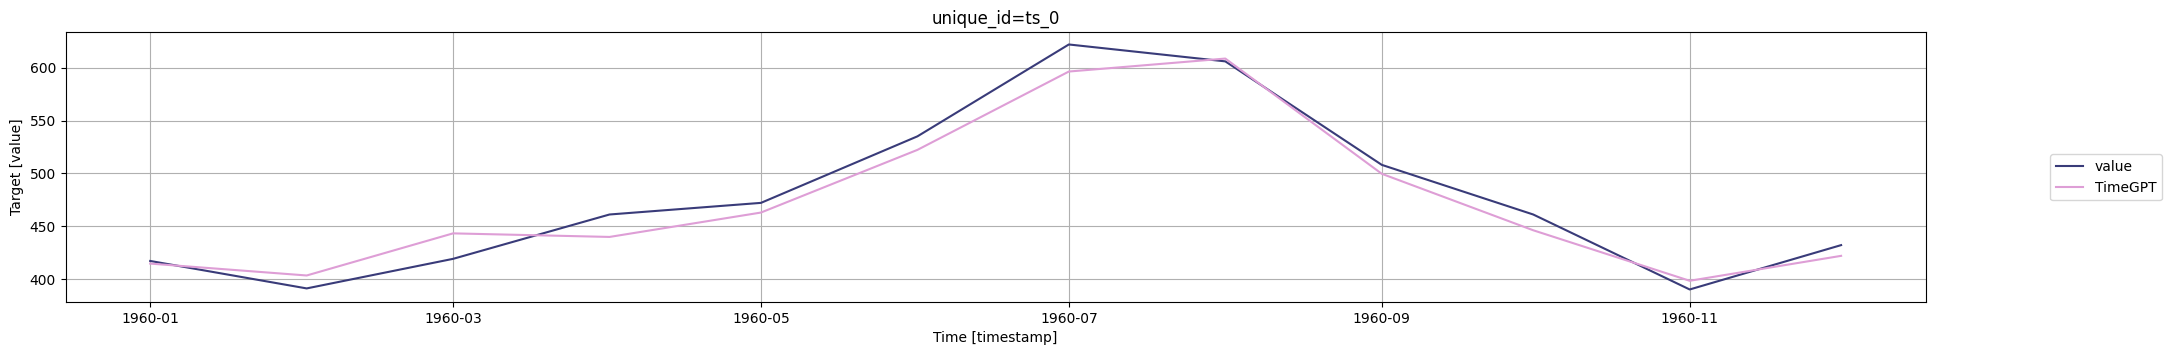

In [87]:
nixtla_client.plot(df_1960, forecasted_data, time_col='timestamp', target_col='value')